In [1]:
import argparse
import sys
sys.path.append('../src')
import loader
import rnn_encoder_decoder
from torchtext import data
import torch
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# MUST USE GPU (?)
parser = rnn_encoder_decoder.rnn_encoder_decoder_argparser()
args = parser.parse_args([])
#args.cpu = True
args.split_chinese_into_characters = False

In [3]:
train_data, val_data, test_data, src, trg = loader.load_data(args)

Most common source vocabs: [('的', 272264), ('我', 83174), ('是', 71290), ('我们', 68696), ('在', 55727), ('了', 52197), ('你', 40824), ('这', 36049), ('一个', 33590), ('他们', 25256)]
Source vocab size: 47127
Most common english vocabs: [('the', 178698), ('and', 128020), ('to', 106119), ('of', 98919), ('a', 90534), ('that', 80454), ('i', 68877), ('in', 66951), ('it', 64198), ('you', 61161)]
English vocab size: 28791


In [16]:
trg_keys = list(trg.vocab.stoi.keys())

In [20]:
for key in trg_keys:
    if '(' in key or '{' in key:
        print(key)

In [18]:
for key in trg_keys:
    if '&' in key:
        print(key)

&apos;s
&quot;
&apos;t
&apos;re
&apos;ve
&apos;m
&apos;ll
&apos;d
&apos;
&#91;
&#93;
&amp;
&apos;clock
&apos;all
&apos;s-eye
&apos;am
&apos;n
&apos;i
&apos;ivoire
&apos;mon
&apos;neill
&apos;an
&apos;oeil
&apos;a
&apos;andrea
&apos;est
&apos;toole
&apos;ts
&apos;walking
&apos;état


In [21]:
args.data='../data/iwslt-vi-en'
args.source_lang = 'vi'
train_data, val_data, test_data, src, trg = loader.load_data(args)

Most common source vocabs: [('là', 51451), ('và', 47993), ('một', 40378), ('tôi', 38381), ('những', 37809), ('của', 36330), ('có', 26166), ('bạn', 26111), ('đó', 25229), ('không', 25169)]
Source vocab size: 20099
Most common english vocabs: [('the', 109723), ('and', 79673), ('to', 65979), ('of', 60510), ('a', 55374), ('that', 49320), ('i', 43629), ('in', 41318), ('it', 39058), ('you', 37438)]
English vocab size: 22429


In [22]:
trg_keys = list(trg.vocab.stoi.keys())

In [23]:
for key in trg_keys:
    if '(' in key or '{' in key:
        print(key)

In [24]:
for key in trg_keys:
    if '&' in key:
        print(key)

&apos;s
&quot;
&apos;t
&apos;re
&apos;ve
&apos;m
&apos;ll
&apos;d
&apos;
&#91;
&#93;
&amp;
&apos;clock
&apos;s-eye
&apos;am
&apos;all
&apos;mon
&apos;an
&apos;ivoire
&apos;a
&apos;andrea
&apos;i
&apos;n
&apos;oeil
&apos;toole
&apos;walking
&apos;état


In [25]:
src_keys = list(src.vocab.stoi.keys())

In [26]:
for key in src_keys:
    if '(' in key or '{' in key:
        print(key)

In [35]:
for key in src_keys:
    if '&' in key:
        print(key)

In [30]:
for key in src_keys:
    if 'quot' in key:
        print(key)

quot


In [32]:
for key in src_keys:
    if '91' in key:
        print(key)

1991
1918
91
1910
1919
911
1912
1915
1891
1913


In [33]:
for key in src_keys:
    if '93' in key:
        print(key)

1930
93
1993
1938
1932
1933
1939
1931
1934
1936


In [36]:
for key in src_keys:
    if 'unk' in key:
        print(key)

<unk>
Bunker
Punk
junk
punk


In [6]:
device = torch.device("cuda" if (not args.cpu) and torch.cuda.is_available() else "cpu")
train_iter = data.BucketIterator(
        dataset=train_data, 
        batch_size=args.batch_size,
        repeat=False,
        sort_key=lambda x: len(x.src),
        sort_within_batch=True,
        device=device,
        train=True
)

Text(0.5,1,'target sentence lengths')

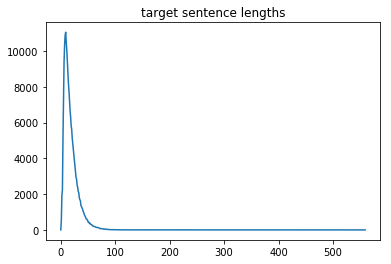

In [39]:
counter = Counter()
for each in train_iter.dataset:
    counter[len(each.trg)]+=1
plt.plot(sorted(counter), [counter[i] for i in sorted(counter)])
plt.title("target sentence lengths")

In [27]:
# 
for i, train_batch in enumerate(iter(train_iter)):
    if len(train_batch) != args.batch_size:
        print("found")
        print(i, train_batch)
    continue

found
6614 
[torchtext.data.batch.Batch of size 26]
	[.src]:('[torch.cuda.LongTensor of size 50x26 (GPU 0)]', '[torch.cuda.LongTensor of size 26 (GPU 0)]')
	[.trg]:('[torch.cuda.LongTensor of size 50x26 (GPU 0)]', '[torch.cuda.LongTensor of size 26 (GPU 0)]')
	[.idx]:[torch.cuda.LongTensor of size 26 (GPU 0)]
